# 用pytorch搭建全连接神经网络，对Fashion-MNIST数据集中的时尚物品进行分类

## 概要
本课，你将通过业界知名的深度学习框架pytorch搭建四层全连接神经网络，分析Fashion-MNIST数据集中的六万张训练集图片和一万张测试集图片，观察训练误差和验证误差随训练代数提高的变化。
首先搭建普通的四层全连接神经网络，训练后发现过拟合明显。
通过Dropout方法，减少过拟合。
你将掌握图像多分类、准确率与误差分析、搭建全连接神经网络并通过Adam算法进行梯度下降训练，最重要的是，熟悉pytorch这一简洁明快的深度学习工具。

Github：[zihaopytorch](https://github.com/TommyZihao/zihaopytorch)<br>

![Fashion-MNIST时尚物品数据集](https://upload-images.jianshu.io/upload_images/13714448-e0d2b1be2bb1702e.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## 作者

张子豪 同济大学研究生 2019-06-06

Bilibili视频教程：[同济子豪兄](https://space.bilibili.com/1900783/#/)<br>

知乎专栏：[人工智能小技巧](https://zhuanlan.zhihu.com/c_1032626015746502656)<br>

简书专栏：[人工智能小技巧](https://www.jianshu.com/u/38cccf09b515)<br>


# 粉丝答疑交流QQ群：953712961


# 微信赞赏码

![子豪兄的赞赏码](https://upload-images.jianshu.io/upload_images/13714448-bec288cb077c7f08.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

# 0.安装pytorch

## 0.1下载pytorch
打开pytorch[官网](https://pytorch.org/get-started/locally/)，选择对应操作系统、python版本、python包管理器和CUDA版本的pytorch，界面上会自动生成你需要运行的命令行。
例如，我是Windows64位、python3.7，使用pip作为python包管理器，不需要CUDA，我的界面长这个样子
![pytorch下载界面](https://upload-images.jianshu.io/upload_images/13714448-579e4ad805844c95.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

按界面提示，我需要在操作系统命令行中运行以下两条命令：<br>

`pip3 install https://download.pytorch.org/whl/cpu/torch-1.1.0-cp37-cp37m-win_amd64.whl`

`pip3 install https://download.pytorch.org/whl/cpu/torchvision-0.3.0-cp37-cp37m-win_amd64.whl`

## 0.2验证安装成功

运行下面的代码单元，如果正常就说明pytorch安装成功啦！

In [35]:
import torch

In [36]:
torch.__version__

'1.1.0'

In [37]:
# 上面单元格的运行结果：pytorch的版本号

# 1 下载Fasion-MNIST数据集

`Fashion-MNIST`是一个替代原始的[MNIST手写数字数据集](http://yann.lecun.com/exdb/mnist/)的`另一个`图像数据集。 它是由Zalando（一家德国的时尚科技公司）旗下的[研究部门](https://research.zalando.com/)提供。其涵盖了来自10种类别的共7万个不同商品的正面图片。Fashion-MNIST的大小、格式和训练集/测试集划分与原始的MNIST完全一致。60000/10000的训练测试数据划分，28x28的灰度图片。你可以直接用它来测试你的机器学习和深度学习算法性能，且**不需要**改动任何的代码。

Fashion-MNIST 数据集的[中文文档说明](https://github.com/zalandoresearch/fashion-mnist/blob/master/README.zh-CN.md)


In [8]:
import torch  # 导入pytorch
from torch import nn, optim  # 导入神经网络与优化器对应的类
import torch.nn.functional as F 
from torchvision import datasets, transforms ## 导入数据集与数据预处理的方法

In [11]:
# 数据预处理：标准化图像数据，使得灰度数据在-1到+1之间
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

# 下载Fashion-MNIST训练集数据，并构建训练集数据载入器trainloader,每次从训练集中载入64张图片，每次载入都打乱顺序
trainset = datasets.FashionMNIST('/Users/emma/Downloads/dataset/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# 下载Fashion-MNIST测试集数据，并构建测试集数据载入器trainloader,每次从测试集中载入64张图片，每次载入都打乱顺序
testset = datasets.FashionMNIST('/Users/emma/Downloads/dataset/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:56<00:00, 470344.88it/s] 


Extracting /Users/emma/Downloads/dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to /Users/emma/Downloads/dataset/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 94802.55it/s]


Extracting /Users/emma/Downloads/dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /Users/emma/Downloads/dataset/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:06<00:00, 704808.06it/s] 


Extracting /Users/emma/Downloads/dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /Users/emma/Downloads/dataset/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11269455.63it/s]

Extracting /Users/emma/Downloads/dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/emma/Downloads/dataset/FashionMNIST/raw



In [33]:
len(trainloader)
#trainloader.dataset


938

## 显示图片

这张图片对应的标签是 外套


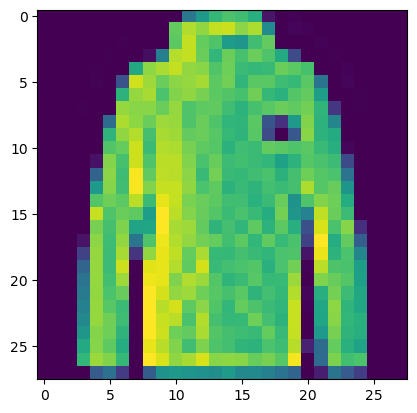

In [18]:
image, label = next(iter(trainloader))

# image图片中有64张图片，我们查看索引为2的图片
imagedemo = image[3]
imagedemolabel = label[3]



imagedemo = imagedemo.reshape((28,28))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(imagedemo)

labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
print(f'这张图片对应的标签是 {labellist[imagedemolabel]}')

# 2 打开数据集中的图片

In [19]:
image, label = next(iter(trainloader))

In [20]:
image.shape

torch.Size([64, 1, 28, 28])

image包含了64张28 * 28的灰度图片，1代表单通道，也就是灰度

In [21]:
label

tensor([5, 7, 0, 1, 4, 0, 6, 0, 5, 9, 3, 3, 7, 0, 8, 3, 8, 8, 7, 6, 8, 6, 7, 3,
        9, 2, 4, 8, 8, 7, 4, 4, 3, 1, 1, 5, 8, 6, 1, 6, 1, 7, 2, 9, 9, 4, 8, 2,
        4, 2, 1, 5, 3, 4, 8, 7, 9, 6, 6, 5, 4, 0, 4, 2])

label包含了image里面64张图片对应的标签

| 标注编号 | 描述 |
| --- | --- |
| 0 | T-shirt/top（T恤）|
| 1 | Trouser（裤子）|
| 2 | Pullover（套衫）|
| 3 | Dress（裙子）|
| 4 | Coat（外套）|
| 5 | Sandal（凉鞋）|
| 6 | Shirt（汗衫）|
| 7 | Sneaker（运动鞋）|
| 8 | Bag（包）|
| 9 | Ankle boot（踝靴）|

## 打开训练集中的一张图片看看

In [22]:
imagedemo = image[2]
imagedemolabel = label[2]

In [23]:
imagedemo.shape

torch.Size([1, 28, 28])

In [24]:
imagedemo = imagedemo.reshape((28,28))

In [25]:
imagedemo.shape

torch.Size([28, 28])

In [26]:
imagedemolabel

tensor(0)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

这张图片对应的标签是 T恤


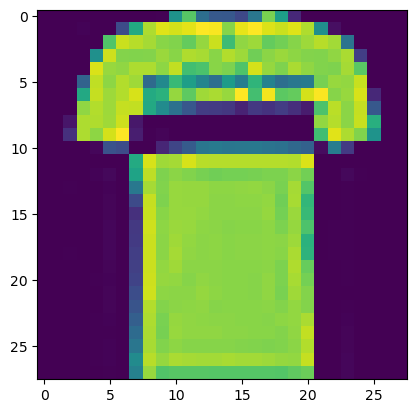

In [28]:
plt.imshow(imagedemo)

labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
print(f'这张图片对应的标签是 {labellist[imagedemolabel]}')

## 查看一张图片和标签完整的代码

这张图片对应的标签是 套衫


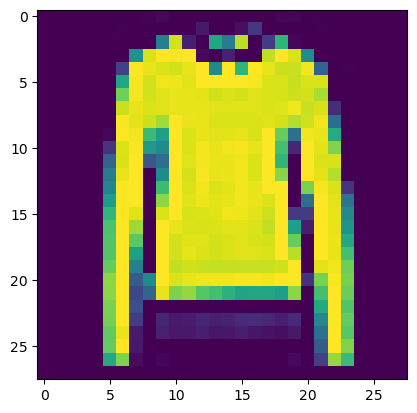

In [29]:
image, label = next(iter(trainloader))

# image图片中有64张图片，我们查看索引为2的图片
imagedemo = image[3]
imagedemolabel = label[3]

imagedemo = imagedemo.reshape((28,28))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(imagedemo)

labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
print(f'这张图片对应的标签是 {labellist[imagedemolabel]}')

# 2 搭建并训练四层全连接神经网络

神经网络的输入为28 * 28 = 784 个像素<br>
第一个隐含层包含256个神经元<br>
第二个隐含层包含128个神经元<br>
第三个隐含层包含64个神经元<br>
输出层输出10个结果，对应图片的10种分类<br>

![全连接神经网络](https://upload-images.jianshu.io/upload_images/13714448-c8b5fa11504798bf.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

In [30]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

Here's the explanation:

x: This is a PyTorch tensor, presumably representing some input data.
.view(x.shape[0], -1): This is a PyTorch method used to reshape the tensor. In this case, it's making sure that the input tensor x is flattened.
x.shape[0]: The first dimension of the tensor, which is often the batch size. This part keeps the batch size unchanged.
-1: The -1 in the second argument of view means that PyTorch should automatically infer the size for this dimension. In other words, it's telling PyTorch to figure out the size of this dimension based on the total number of elements in the tensor.
So, after this operation, the tensor x is flattened, and its shape becomes (batch_size, total_number_of_elements_in_one_batch). This is commonly done before feeding data into a fully connected layer of a neural network, where each input sample needs to be a flat vector rather than a multi-dimensional tensor.

In [53]:
# 对上面定义的Classifier类进行实例化
model = Classifier()

# 定义损失函数为负对数损失函数

criterion = nn.NLLLoss()

# 优化方法为Adam梯度下降方法，学习率为0.003
optimizer = optim.Adam(model.parameters(), lr=0.003)

# 对训练集的全部数据学习15遍，这个数字越大，训练时间越长
epochs = 15

# 将每次训练的训练误差和测试误差存储在这两个列表里，后面绘制误差变化折线图用
train_losses, test_losses = [], []

print('开始训练')
for e in range(epochs):
    running_loss = 0
    
    # 对训练集中的所有图片都过一遍
    for images, labels in trainloader:
        # 将优化器中的求导结果都设为0，否则会在每次反向传播之后叠加之前的
        optimizer.zero_grad()
        
        # 对64张图片进行推断，计算损失函数，反向传播优化权重，将损失求和
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # 每次学完一遍数据集，都进行以下测试操作
    else:
        test_loss = 0
        accuracy = 0
        # 测试的时候不需要开自动求导和反向传播
        with torch.no_grad():
            # 关闭Dropout
            model.eval()
            
            # 对测试集中的所有图片都过一遍
            for images, labels in testloader:
                # 对传入的测试集图片进行正向推断、计算损失，accuracy为测试集一万张图片中模型预测正确率
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                
                # 等号右边为每一批64张测试图片中预测正确的占比
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        # 恢复Dropout
        model.train()
        # 将训练误差和测试误差存在两个列表里，后面绘制误差变化折线图用
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("训练集学习次数: {}/{}.. ".format(e+1, epochs),
              "训练误差: {:.3f}.. ".format(running_loss/len(trainloader)),
              "测试误差: {:.3f}.. ".format(test_loss/len(testloader)),
              "模型分类准确率: {:.3f}".format(accuracy/len(testloader)))

开始训练
训练集学习次数: 1/15..  训练误差: 0.515..  测试误差: 0.436..  模型分类准确率: 0.844
训练集学习次数: 2/15..  训练误差: 0.389..  测试误差: 0.395..  模型分类准确率: 0.856
训练集学习次数: 3/15..  训练误差: 0.353..  测试误差: 0.395..  模型分类准确率: 0.858
训练集学习次数: 4/15..  训练误差: 0.331..  测试误差: 0.395..  模型分类准确率: 0.858
训练集学习次数: 5/15..  训练误差: 0.316..  测试误差: 0.368..  模型分类准确率: 0.874
训练集学习次数: 6/15..  训练误差: 0.301..  测试误差: 0.364..  模型分类准确率: 0.870
训练集学习次数: 7/15..  训练误差: 0.288..  测试误差: 0.375..  模型分类准确率: 0.867
训练集学习次数: 8/15..  训练误差: 0.282..  测试误差: 0.380..  模型分类准确率: 0.872
训练集学习次数: 9/15..  训练误差: 0.270..  测试误差: 0.373..  模型分类准确率: 0.876
训练集学习次数: 10/15..  训练误差: 0.264..  测试误差: 0.380..  模型分类准确率: 0.869
训练集学习次数: 11/15..  训练误差: 0.257..  测试误差: 0.361..  模型分类准确率: 0.884
训练集学习次数: 12/15..  训练误差: 0.250..  测试误差: 0.379..  模型分类准确率: 0.868
训练集学习次数: 13/15..  训练误差: 0.249..  测试误差: 0.372..  模型分类准确率: 0.873
训练集学习次数: 14/15..  训练误差: 0.237..  测试误差: 0.347..  模型分类准确率: 0.885
训练集学习次数: 15/15..  训练误差: 0.232..  测试误差: 0.377..  模型分类准确率: 0.884


#我自己的理解
#负对数似然就是交叉熵，最小化交叉熵就是最大化对数似然。
#这种情况是原本的真实的标签就是one-hot编码，所以才可以用交叉熵。

# 3 验证模型效果

## 绘制训练误差和测试误差随学习次数增加的变化

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

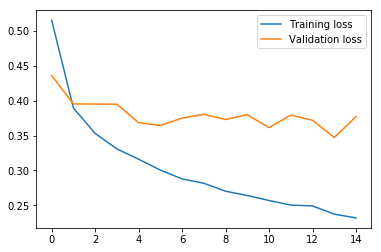

In [55]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend()

可以看到，虽然训练误差一直在下降，但测试误差居高不下，我们的神经网络仿佛一个高分低能的同学，平时把所有课后题答案都死记硬背下来，一到考试见到新题的时候就不会做了。

虽然高分低能，但大部分时候依旧能做出正确判断，但是有时候预测概率只有百分之三四十的把握，不能做到十有八九的确定。

神经网络猜测图片里是 套衫，概率为49.677035212516785%


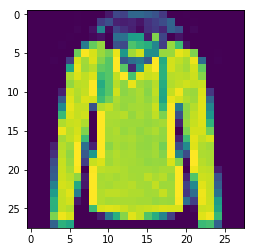

In [95]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.reshape((28,28)).numpy()
plt.imshow(img)

# 将测试图片转为一维的列向量
img = torch.from_numpy(img)
img = img.view(1, 784)

# 进行正向推断，预测图片所在的类别
with torch.no_grad():
    output = model.forward(img)
ps = torch.exp(output)

top_p, top_class = ps.topk(1, dim=1)
labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
prediction = labellist[top_class]
probability = float(top_p)
print(f'神经网络猜测图片里是 {prediction}，概率为{probability*100}%')

# 4 采用Dropout方法防止过拟合

我们可以采用Dropout的方法，也就是在每次正向推断训练神经元的时候随机“掐死”一部分神经元，阻断其输入输出，这样可以起到正则化的作用。

可以理解为，皇上雨露均沾，今天受宠，明天可能就被打入冷宫，这样就防止了杨贵妃那样的“三千宠爱在一身”，从而防止了某些神经元一家独大，成为话题领袖，只手遮天。

所有神经元处于平等地位，防止过拟合。

In [57]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        # 构造Dropout方法，在每次训练过程中都随机“掐死”百分之二十的神经元，防止过拟合。
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # 确保输入的tensor是展开的单列数据，把每张图片的通道、长度、宽度三个维度都压缩为一列
        x = x.view(x.shape[0], -1)
        
        # 在训练过程中对隐含层神经元的正向推断使用Dropout方法
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        # 在输出单元不需要使用Dropout方法
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [58]:
# 对上面定义的Classifier类进行实例化
model = Classifier()

# 定义损失函数为负对数损失函数
criterion = nn.NLLLoss()

# 优化方法为Adam梯度下降方法，学习率为0.003
optimizer = optim.Adam(model.parameters(), lr=0.003)

# 对训练集的全部数据学习15遍，这个数字越大，训练时间越长
epochs = 15

# 将每次训练的训练误差和测试误差存储在这两个列表里，后面绘制误差变化折线图用
train_losses, test_losses = [], []

print('开始训练')
for e in range(epochs):
    running_loss = 0
    
    # 对训练集中的所有图片都过一遍
    for images, labels in trainloader:
        # 将优化器中的求导结果都设为0，否则会在每次反向传播之后叠加之前的
        optimizer.zero_grad()
        
        # 对64张图片进行推断，计算损失函数，反向传播优化权重，将损失求和
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # 每次学完一遍数据集，都进行以下测试操作
    else:
        test_loss = 0
        accuracy = 0
        # 测试的时候不需要开自动求导和反向传播
        with torch.no_grad():
            # 关闭Dropout
            model.eval()
            
            # 对测试集中的所有图片都过一遍
            for images, labels in testloader:
                # 对传入的测试集图片进行正向推断、计算损失，accuracy为测试集一万张图片中模型预测正确率
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                
                # 等号右边为每一批64张测试图片中预测正确的占比
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        # 恢复Dropout
        model.train()
        # 将训练误差和测试误差存在两个列表里，后面绘制误差变化折线图用
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("训练集学习次数: {}/{}.. ".format(e+1, epochs),
              "训练误差: {:.3f}.. ".format(running_loss/len(trainloader)),
              "测试误差: {:.3f}.. ".format(test_loss/len(testloader)),
              "模型分类准确率: {:.3f}".format(accuracy/len(testloader)))

开始训练
训练集学习次数: 1/15..  训练误差: 0.604..  测试误差: 0.488..  模型分类准确率: 0.821
训练集学习次数: 2/15..  训练误差: 0.480..  测试误差: 0.439..  模型分类准确率: 0.844
训练集学习次数: 3/15..  训练误差: 0.449..  测试误差: 0.422..  模型分类准确率: 0.848
训练集学习次数: 4/15..  训练误差: 0.428..  测试误差: 0.424..  模型分类准确率: 0.852
训练集学习次数: 5/15..  训练误差: 0.425..  测试误差: 0.406..  模型分类准确率: 0.850
训练集学习次数: 6/15..  训练误差: 0.409..  测试误差: 0.392..  模型分类准确率: 0.862
训练集学习次数: 7/15..  训练误差: 0.403..  测试误差: 0.395..  模型分类准确率: 0.857
训练集学习次数: 8/15..  训练误差: 0.399..  测试误差: 0.388..  模型分类准确率: 0.863
训练集学习次数: 9/15..  训练误差: 0.394..  测试误差: 0.381..  模型分类准确率: 0.866
训练集学习次数: 10/15..  训练误差: 0.386..  测试误差: 0.387..  模型分类准确率: 0.865
训练集学习次数: 11/15..  训练误差: 0.384..  测试误差: 0.407..  模型分类准确率: 0.857
训练集学习次数: 12/15..  训练误差: 0.377..  测试误差: 0.392..  模型分类准确率: 0.862
训练集学习次数: 13/15..  训练误差: 0.368..  测试误差: 0.386..  模型分类准确率: 0.871
训练集学习次数: 14/15..  训练误差: 0.375..  测试误差: 0.391..  模型分类准确率: 0.869
训练集学习次数: 15/15..  训练误差: 0.373..  测试误差: 0.390..  模型分类准确率: 0.867


In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

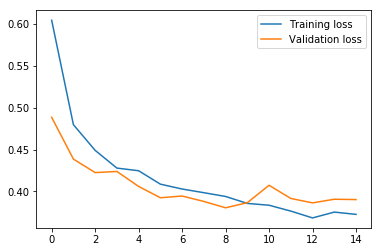

In [60]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend()

可以看到，训练误差和测试误差都随学习次数增加逐渐降低，没有出现“高分低能”和“死记硬背”的过拟合现象，这其实是Dropout正则化的功劳。

神经网络猜测图片里是 套衫，概率为99.89591240882874%


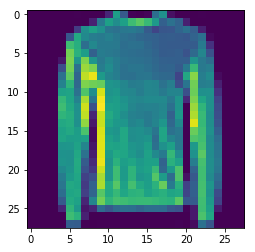

In [90]:
model.eval()
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.reshape((28,28)).numpy()
plt.imshow(img)

# 将测试图片转为一维的列向量
img = torch.from_numpy(img)
img = img.view(1, 784)

# 进行正向推断，预测图片所在的类别
with torch.no_grad():
    output = model.forward(img)
ps = torch.exp(output)

top_p, top_class = ps.topk(1, dim=1)
labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
prediction = labellist[top_class]
probability = float(top_p)
print(f'神经网络猜测图片里是 {prediction}，概率为{probability*100}%')